# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Alif Adwitiya Pratama
- **Email:** alifadwitiyap@gmail.com
- **ID Dicoding:** alifadwitiyapr

## Menentukan Pertanyaan Bisnis

- Bagaimana peforma penyewaan sepeda beberapa tahun terakhir?
- Pada musim apa penyewaan sepeda paling ramai dan sepi?
- Pada cuaca apa penyewaan sepeda paling ramai dan sepi?
- Jam berapakah penyewaan sepeda paling ramai dan paling sepi?
- Pada Hari apa penyewaan sepeda paling ramai dan paling sepi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt	

#stop warning
import warnings
warnings.filterwarnings("ignore")

#gunakan theme seaborn warna 
sns.set(style="whitegrid")



## Data Wrangling

### Gathering Data

In [2]:
dfday=pd.read_csv('dataset/day.csv')
dfday.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
dfhour=pd.read_csv('dataset/hour.csv')
dfhour.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
dfday[dfday['weekday']==0]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
15,16,2011-01-16,1,0,1,0,0,0,1,0.231667,0.234217,0.483750,0.188433,251,953,1204
22,23,2011-01-23,1,0,1,0,0,0,1,0.096522,0.098839,0.436522,0.246600,150,836,986
29,30,2011-01-30,1,0,1,0,0,0,1,0.216522,0.250322,0.722174,0.073983,140,956,1096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,702,2012-12-02,4,1,12,0,0,0,2,0.347500,0.359208,0.823333,0.124379,892,3757,4649
708,709,2012-12-09,4,1,12,0,0,0,2,0.384167,0.390146,0.905417,0.157975,441,2787,3228
715,716,2012-12-16,4,1,12,0,0,0,2,0.362500,0.369938,0.838750,0.100742,538,3248,3786
722,723,2012-12-23,1,1,12,0,0,0,1,0.245833,0.259471,0.515417,0.133083,408,1379,1787


**Insight:**
- Dataset berasal dari [kaggle](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset)
- Sistem berbagi sepeda adalah generasi baru dari penyewaan sepeda tradisional, dimana seluruh proses dari keanggotaan, penyewaan, dan pengembalian telah menjadi otomatis. Saat ini, terdapat lebih dari 500 program berbagi sepeda di seluruh dunia, yang terdiri dari lebih dari 500 ribu sepeda. Sistem ini menarik perhatian karena peranannya yang penting dalam mengatasi masalah lalu lintas, lingkungan, dan kesehatan.
- Baik hour.csv dan day.csv memiliki kolom berikut, kecuali hr yang tidak tersedia di day.csv
	- instant : indeks catatan
	- dteday : tanggal
	- season : musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin)
	- yr : tahun (0: 2011, 1: 2012)
	- mnth : bulan (1 sampai 12)
	- hr : jam (0 hingga 23)
	- holiday : hari cuaca hari libur atau tidak (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : hari dalam seminggu
	- workingday : jika hari tersebut bukan akhir pekan atau hari libur maka nilainya 1, jika tidak maka nilainya 0.
	- weathersit :
		- 1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
		- 2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
		- 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan
		- 4: Hujan Lebat + Butiran Es + Badai Petir + Kabut, Salju + Kabut
	- temp: Suhu yang dinormalisasi dalam Celcius.  
	Nilai diperoleh melalui (t-t_min)/(t_max-t_min), t_min = -8, t_max = +39 (hanya dalam skala per jam)
	- atemp:  
	Suhu perasaan yang dinormalisasi dalam Celcius.  
	Nilai-nilai ini diperoleh melalui (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (hanya dalam skala per jam)
	- hum: Kelembapan yang dinormalisasi.  
	Nilai dibagi menjadi 100 (maksimum)
	- windspeed: Kecepatan angin yang dinormalisasi.  
	Nilai dibagi menjadi 67 (maks)
	- casual: jumlah pengguna biasa
	- terdaftar: jumlah pengguna terdaftar
	- cnt: jumlah total sepeda sewaan termasuk kasual dan terdaftar


### Assessing Data

#### Check Shape Data

In [5]:
dfday.weekday.value_counts()

weekday
6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: count, dtype: int64

In [6]:
print("terdapat {} baris dan {} kolom pada dataset day".format(dfday.shape[0],dfday.shape[1]))
print("terdapat {} baris dan {} kolom pada dataset hour".format(dfhour.shape[0],dfhour.shape[1]))

terdapat 731 baris dan 16 kolom pada dataset day
terdapat 17379 baris dan 17 kolom pada dataset hour


#### Check Jarak Waktu Data

In [7]:
print("pada dataset day memiliki tanggal minimal {} dan tanggal maksimal {}".format(dfday['dteday'].min(),dfday['dteday'].max()))
print("pada dataset hour memiliki tanggal minimal {} dan tanggal maksimal {}".format(dfhour['dteday'].min(),dfhour['dteday'].max()))

pada dataset day memiliki tanggal minimal 2011-01-01 dan tanggal maksimal 2012-12-31
pada dataset hour memiliki tanggal minimal 2011-01-01 dan tanggal maksimal 2012-12-31


#### Check Null

In [8]:
print("terdapat {} data kosong pada dataset day.csv".format(dfday.isnull().sum().sum()))
print("terdapat {} data kosong pada dataset hour.csv".format(dfhour.isnull().sum().sum()))

terdapat 0 data kosong pada dataset day.csv
terdapat 0 data kosong pada dataset hour.csv


#### Check Duplicates

In [9]:
print("terdapat {} data duplikat pada dataset day.csv".format(dfday.duplicated().sum()))
print("terdapat {} data duplikat pada dataset hour.csv".format(dfhour.duplicated().sum()))

terdapat 0 data duplikat pada dataset day.csv
terdapat 0 data duplikat pada dataset hour.csv


#### Check Statistical Description Data

In [10]:
dfday.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
dfhour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Check Data Types

In [12]:
print("datatype pada dataset day")
dfday.info()
print("\n\ndatatype pada dataset hour")
dfhour.info()

datatype pada dataset day
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


datatype pada dataset hour
<class 'pandas.core.frame.DataFrame'>


**Insight:**
- diperlukan konversi data dteday dari objek 'datetime'
- diperlukan konversi data encoded ke nilai yang lebih mudah dipahami 
- diperlukan konversi data temp,atemp, hum dan windspeed ke dalam skala yang lebih mudah dipahami


### Cleaning Data

#### handle dteday

In [13]:
dfday['dteday'] = pd.to_datetime(dfday['dteday'])
dfhour['dteday'] = pd.to_datetime(dfhour['dteday'])

#### Konversi encoded data ke nilai yang lebih mudah dipahami

In [14]:
# konversi season 
dfday['season'].replace((1,2,3,4), ('springer','summer','fall','winter'), inplace=True)
dfhour['season'].replace((1,2,3,4), ('springer','summer','fall','winter'), inplace=True)

# konversi year 
dfday['yr'].replace((0,1), ('2011','2012'), inplace=True)
dfhour['yr'].replace((0,1), ('2011','2012'), inplace=True)

# konversi month 
dfday['mnth'].replace((1,2,3,4,5,6,7,8,9,10,11,12),('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'), inplace=True)
dfhour['mnth'].replace((1,2,3,4,5,6,7,8,9,10,11,12),('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'), inplace=True)

#konversi weathersit
dfday['weathersit'].replace((1,2,3,4), ('clear','misty','light_rain','heavy_rain'), inplace=True)
dfhour['weathersit'].replace((1,2,3,4), ('clear','misty','light_rain','heavy_rain'), inplace=True)

#konversi weekday
dfday['weekday'].replace((0,1,2,3,4,5,6), ('sun','mon','tue','wed','thu','fri','sat'), inplace=True)
dfhour['weekday'].replace((0,1,2,3,4,5,6), ('sun','mon','tue','wed','thu','fri','sat'), inplace=True)


#### Unormalized Data

In [15]:

#unormalized temp
dfday['temp'] = (dfday['temp']*(39+8))-8
dfday['atemp'] = (dfday['atemp']*(50+16))-16

dfhour['temp'] = (dfhour['temp']*(39+8))-8
dfhour['atemp'] = (dfhour['atemp']*(50+16))-16

#unormalized windspeed
dfday['windspeed'] = dfday['windspeed']*67
dfhour['windspeed'] = dfhour['windspeed']*67

#unormalized humidity
dfday['hum'] = dfday['hum']*100
dfhour['hum'] = dfhour['hum']*100


In [16]:
dfday.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,jan,0,sat,0,misty,8.175849,7.999250,80.5833,10.749882,331,654,985
1,2,2011-01-02,springer,2011,jan,0,sun,0,misty,9.083466,7.346774,69.6087,16.652113,131,670,801
2,3,2011-01-03,springer,2011,jan,0,mon,1,clear,1.229108,-3.499270,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,springer,2011,jan,0,tue,1,clear,1.400000,-1.999948,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,springer,2011,jan,0,wed,1,clear,2.666979,-0.868180,43.6957,12.522300,82,1518,1600


In [17]:
dfday.to_csv('dataset/day_clean.csv',index=False)
dfhour.to_csv('dataset/hour_clean.csv',index=False)

**Insight:**
- data telah di konversi ke dalam skala yang lebih mudah dipahami
- data telah di unormalized
- dteday telah di konversi ke dalam format datetime

## Exploratory Data Analysis (EDA)

### Explore Performa Rata - Rata Penyewaan Sepeda Tiap Season

In [19]:
dfday.groupby(["season"])['cnt'].mean().reset_index().sort_values('cnt',ascending=False).rename(columns={'cnt':'rata - rata penyewa'}).round()

,season,rata - rata penyewa
0,fall,5644.0
2,summer,4992.0
3,winter,4728.0
1,springer,2604.0


### Explore Performa Rata - Rata Penyewaan Sepeda Tiap Cuaca

In [20]:
dfhour.groupby(["weathersit"])['cnt'].mean().reset_index().sort_values('cnt',ascending=False).rename(columns={'cnt':'rata - rata penyewa'}).round()

,weathersit,rata - rata penyewa
0,clear,205.0
3,misty,175.0
2,light_rain,112.0
1,heavy_rain,74.0


### Explore Performa Rata - Rata Penyewaan Sepeda Tiap Bulan

In [21]:
dfhour.groupby(["mnth"])['cnt'].mean().reset_index().sort_values('cnt',ascending=False).rename(columns={'cnt':'rata - rata penyewa'}).round()

,mnth,rata - rata penyewa
11,sep,241.0
6,jun,241.0
1,aug,238.0
5,jul,232.0
8,may,223.0
10,oct,222.0
0,apr,187.0
9,nov,177.0
7,mar,155.0
2,dec,142.0


### Explore Performa Rata - Rata Penyewaan Sepeda Tiap Hari

In [22]:
dfhour.groupby(["weekday"])['cnt'].mean().reset_index().sort_values('cnt',ascending=False).rename(columns={'cnt':'rata - rata penyewa'}).round()

,weekday,rata - rata penyewa
4,thu,196.0
0,fri,196.0
5,tue,191.0
6,wed,191.0
2,sat,190.0
1,mon,184.0
3,sun,177.0


### Explore Performa Rata - Rata Penyewaan Sepeda Tiap Jam

In [23]:
dfhour.groupby(["hr"])['cnt'].mean().reset_index().sort_values('cnt',ascending=False).rename(columns={'cnt':'rata - rata penyewa'}).round()

,hr,rata - rata penyewa
17,17,461.0
18,18,426.0
8,8,359.0
16,16,312.0
19,19,312.0
13,13,254.0
12,12,253.0
15,15,251.0
14,14,241.0
20,20,226.0


### Explore Performa Rata - Rata Penyewaan Sepeda Berdasarkan Hari Libur atau Bukan

In [24]:
dfday.groupby(["holiday"])['cnt'].mean().reset_index().sort_values('cnt',ascending=False).rename(columns={'cnt':'rata - rata penyewa'}).round()

,holiday,rata - rata penyewa
0,0,4527.0
1,1,3735.0


**Insight:**
- Penyewa sepeda lebih menyukai musim panas dan musim gugur untuk menyewa sepeda
- Penyewa sepeda lebih menyukai cuaca cerah untuk menyewa sepeda
- Penyewa sepeda lebih banyak pada bulan September dan paling sedikit pada bulan Januari
- Penyewa sepeda lebih banyak pada hari Kamis dan paling sedikit pada hari Minggu sekaligus menandakan bahwa sepeda lebih banyak disewa pada hari kerja
- Jam yang paling diminati adalah jam 5 sore, 6 sore, dan 8 pagi 

## Visualization & Explanatory Analysis

- Bagaimana peforma penyewaan sepeda beberapa tahun terakhir?
- Pada musim apa penyewaan sepeda paling ramai dan sepi?
- Pada cuaca apa penyewaan sepeda paling ramai dan sepi?
- Jam berapakah penyewaan sepeda paling tinggi dan paling rendah?
- Pada Hari apa penyewaan sepeda paling tinggi dan paling rendah?

### Pertanyaan 1: Bagaimana peforma penyewaan sepeda beberapa tahun terakhir?

In [26]:
dfday

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cnt_rolling
0,1,2011-01-01,springer,2011,jan,0,sat,0,misty,8.175849,7.999250,80.5833,10.749882,331,654,985,NaN
1,2,2011-01-02,springer,2011,jan,0,sun,0,misty,9.083466,7.346774,69.6087,16.652113,131,670,801,NaN
2,3,2011-01-03,springer,2011,jan,0,mon,1,clear,1.229108,-3.499270,43.7273,16.636703,120,1229,1349,NaN
3,4,2011-01-04,springer,2011,jan,0,tue,1,clear,1.400000,-1.999948,59.0435,10.739832,108,1454,1562,NaN
4,5,2011-01-05,springer,2011,jan,0,wed,1,clear,2.666979,-0.868180,43.6957,12.522300,82,1518,1600,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,springer,2012,dec,0,thu,1,misty,3.945849,-1.041628,65.2917,23.458911,247,1867,2114,4366.766667
727,728,2012-12-28,springer,2012,dec,0,fri,1,misty,3.906651,0.833036,59.0000,10.416557,644,2451,3095,4294.600000
728,729,2012-12-29,springer,2012,dec,0,sat,0,misty,3.906651,-0.001600,75.2917,8.333661,159,1182,1341,4161.866667
729,730,2012-12-30,springer,2012,dec,0,sun,0,clear,4.024151,-0.707800,48.3333,23.500518,364,1432,1796,4032.800000


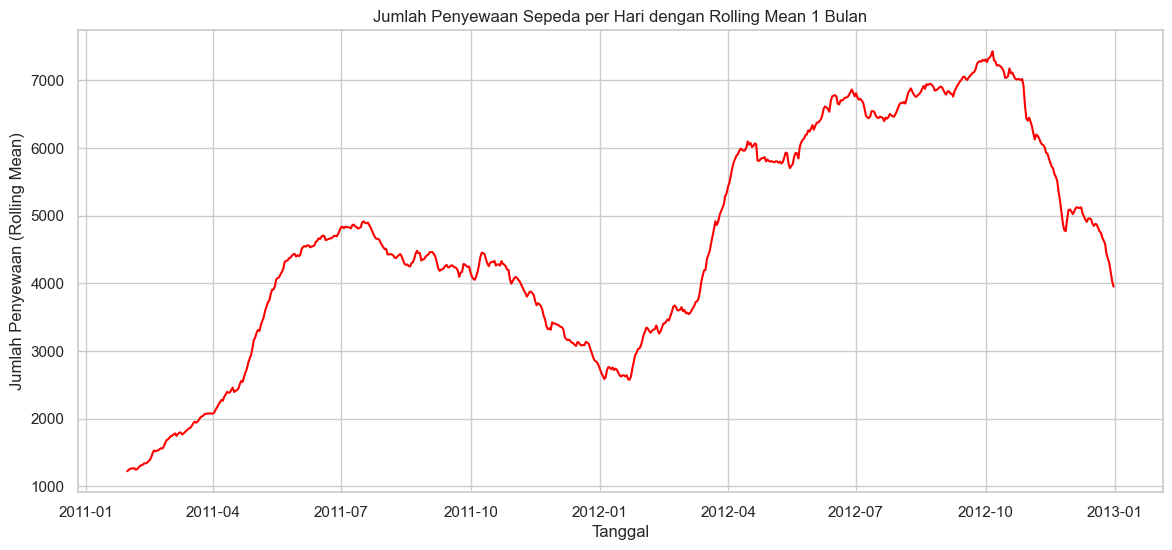

In [25]:
dfday['cnt_rolling'] = dfday['cnt'].rolling(window=30).mean()
plt.figure(figsize=(14, 6))  
ax = sns.lineplot(data=dfday, x='dteday', y='cnt_rolling', color='red')
ax.set(title='Jumlah Penyewaan Sepeda per Hari dengan Rolling Mean 1 Bulan', xlabel='Tanggal', ylabel='Jumlah Penyewaan (Rolling Mean)')
plt.show()


Insight : Terjadi peningkatan penyewaan sepeda dari tahun 2011 ke tahun 2012 dengan peak tertinggi pada pertengahan bulan dan terjadi penurunan pada akhir bulan

### Pertanyaan 2 & 3 : Pada musim apa penyewaan sepeda paling ramai dan sepi? Pada cuaca apa penyewaan sepeda paling ramai dan sepi?

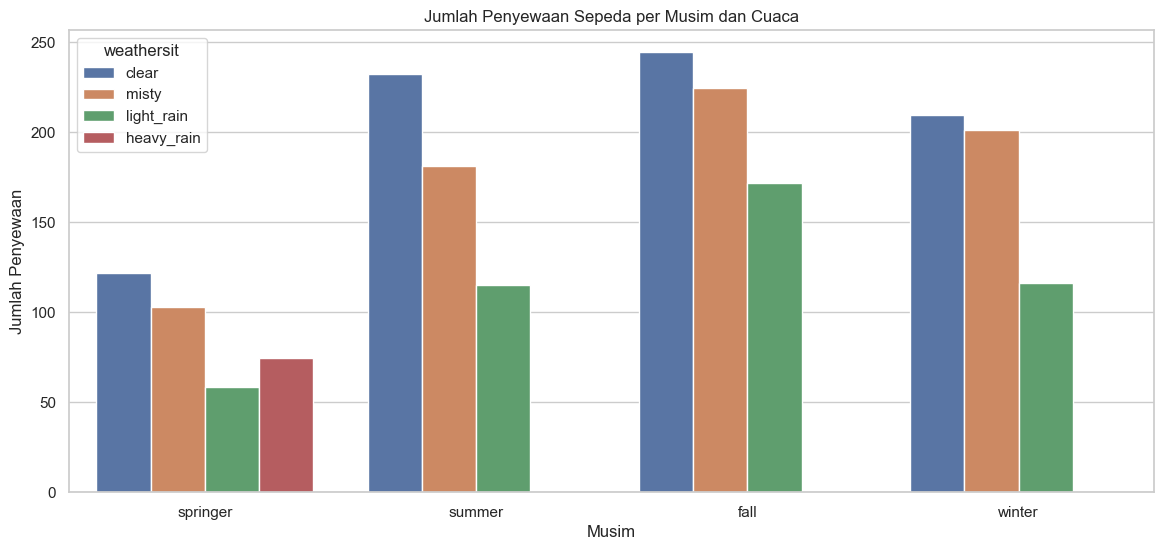

In [28]:
#buat barplot kombinasi musim dan cuaca
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=dfhour, x='season', y='cnt', hue='weathersit', ci=None)
ax.set(title='Jumlah Penyewaan Sepeda per Musim dan Cuaca', xlabel='Musim', ylabel='Jumlah Penyewaan')
plt.show()


Insight : 
- penyewaan sepeda paling ramai pada musim gugur dan paling sepi pada musim semi
- penyewaan sepeda paling ramai pada cuaca cerah dan paling sepi pada cuaca hujan berat. Namun pada musim semi pada cuaca hujan ringan adalah penyewaan sepeda paling sepi
- dari semua musim hanya pada musim semi terdapat penyewaan pada cuaca hujan berat

### Pertanyaan 4 & 5 :Jam berapakah penyewaan sepeda paling ramai dan paling sepi?  Pada Hari apa penyewaan sepeda paling ramai dan paling sepi?

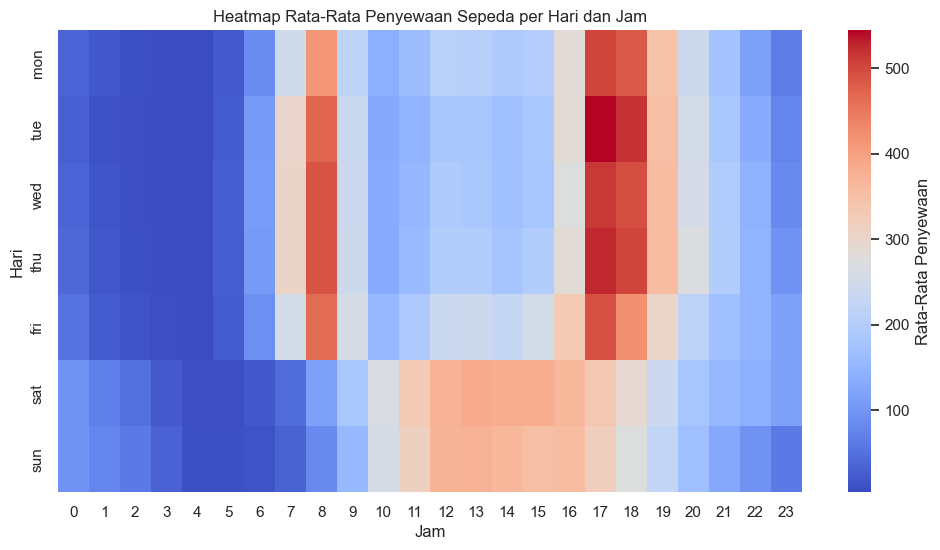

In [32]:
# Create a pivot table with the average count of rentals by weekday and hour
pivot_table = dfhour.pivot_table(values='cnt', index='weekday', columns='hr', aggfunc='mean')

# Reorder the index to start from Monday
order = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
pivot_table = pivot_table.reindex(order)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=False, cbar_kws={'label': 'Rata-Rata Penyewaan'})
plt.title('Heatmap Rata-Rata Penyewaan Sepeda per Hari dan Jam')
plt.xlabel('Jam')
plt.ylabel('Hari')
plt.show()


Insight : 
- terdapat perbedaan pola penyewaan pada saat weekend dan weekdays
- pada weekdays penyewaan sepeda paling ramai pada jam 8 pagi dan 5-6 sore, sedangkan paling sepi dari jam 12 malam hingga jam 5 pagi
- pada weekends penyewaan sepeda paling ramai pada jam 10 pagi - 6 sore dan paling sepi pada jam 3-6 pagi


## Analisis Lanjutan (Opsional)

In [37]:
dfhour.groupby('temp')['cnt'].sum().reset_index().sort_values('cnt', ascending=False)
dfhour['temp_bin'] = pd.cut(dfhour['temp'], bins=5, labels=['Very Cold', 'Cold', 'Moderate', 'Warm', 'Hot'])
dfhour.groupby('temp_bin')['cnt'].mean().reset_index().sort_values('cnt', ascending=False).rename(columns={'cnt': 'rata - rata penyewa'})

,temp_bin,rata - rata penyewa
4,Hot,326.276446
3,Warm,260.695279
2,Moderate,194.671096
1,Cold,123.066828
0,Very Cold,65.069159


Insight :
- rata - rata penyewaan sepeda paling tinggi pada suhu panas dan paling rendah pada suhu sangat dingin

## Conclusion


Dalam proyek analisis data ini, kami menganalisis dataset penyewaan sepeda untuk memahami tren dan pola penyewaan sepeda berdasarkan berbagai faktor seperti musim, cuaca, hari dalam seminggu, dan jam dalam sehari. Berikut adalah ringkasan dari temuan utama kami:

1. **Penyewaan Sepeda Berdasarkan Musim dan Cuaca:**
	- Penyewaan sepeda paling ramai terjadi pada musim gugur dan paling sepi pada musim semi.
	- Cuaca cerah adalah kondisi cuaca yang paling disukai untuk penyewaan sepeda, sementara cuaca hujan berat adalah yang paling tidak disukai.

2. **Penyewaan Sepeda Berdasarkan Bulan:**
	- Bulan September mencatat jumlah penyewaan sepeda tertinggi, sedangkan bulan Januari mencatat jumlah penyewaan terendah.

3. **Penyewaan Sepeda Berdasarkan Hari dalam Seminggu:**
	- Penyewaan sepeda lebih banyak terjadi pada hari kerja, dengan puncaknya pada hari Kamis. Hari Minggu mencatat jumlah penyewaan terendah.

4. **Penyewaan Sepeda Berdasarkan Jam dalam Sehari:**
	- Pada hari kerja, penyewaan sepeda paling ramai terjadi pada jam 8 pagi dan 5-6 sore, menunjukkan pola perjalanan kerja.
	- Pada akhir pekan, penyewaan sepeda paling ramai terjadi antara jam 10 pagi hingga 6 sore.

5. **Penyewaan Sepeda Berdasarkan Hari Libur:**
	- Penyewaan sepeda lebih sedikit pada hari libur dibandingkan dengan hari kerja.

6. **Tren Penyewaan Sepeda dari Tahun ke Tahun:**
	- Terdapat peningkatan penyewaan sepeda dari tahun 2011 ke tahun 2012, dengan puncak tertinggi pada pertengahan bulan dan penurunan pada akhir bulan.

7. **Pengaruh Faktor suhu pada penyewaan sepeda:**
	- rata - rata penyewaan sepeda paling tinggi pada suhu panas dan paling rendah pada suhu sangat dingin
